In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings # current version generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

In [2]:
# Question 1
train_df = pd.read_csv('./Dataset/train.csv')
test_df = pd.read_csv('./Dataset/test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).sum()

,Sex,Survived
0,female,233
1,male,109


<AxesSubplot:xlabel='Sex', ylabel='count'>

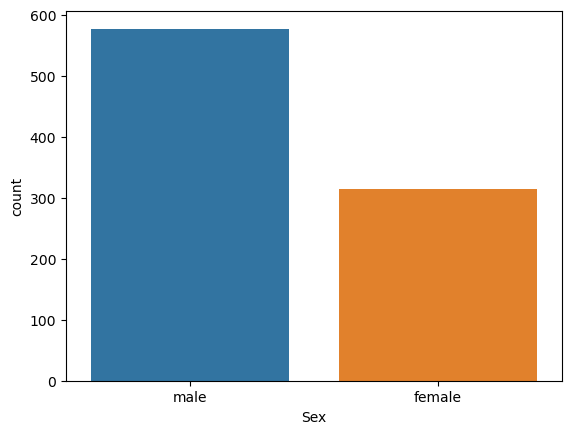

In [7]:
sns.countplot(x='Sex',data=train_df)

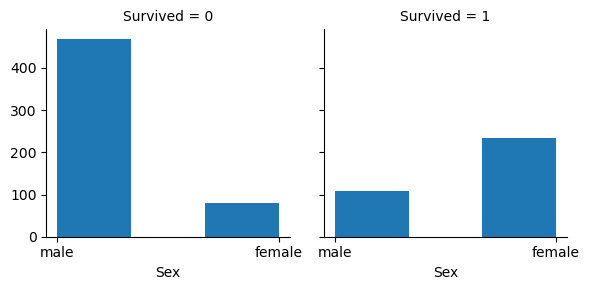

In [8]:
x = sns.FacetGrid(train_df, col='Survived')
x.map(plt.hist, 'Sex', bins=3)

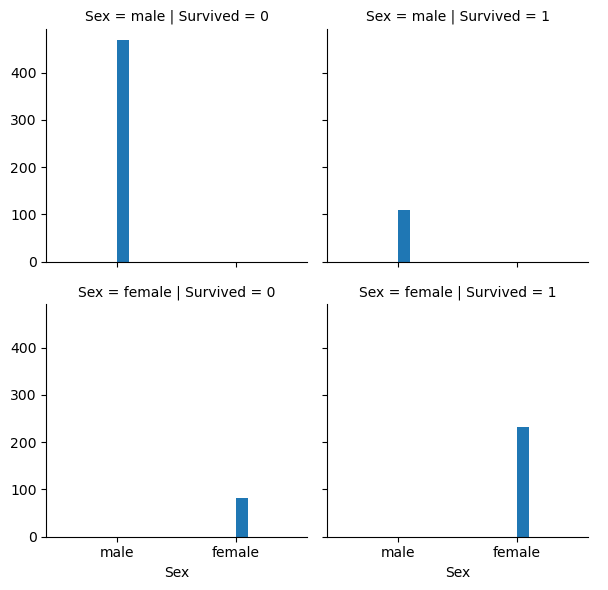

In [9]:
grid = sns.FacetGrid(train_df, col='Survived', row='Sex')
grid.map(plt.hist, 'Sex')
grid.add_legend();

In [10]:
# As there are more males who died compared to females , this feaure as considerable significance in prediction
# of survival hence we should keep this feature

In [11]:
#droping the column that are unrelated
train_df = train_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S


In [12]:
alldata = [train_df,test_df]
for data in alldata:
    data['Title']=data.Name.str.extract('([A-Za-z]+)\.',expand = False)
print(data['Title'])

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object


In [13]:
for data in alldata:
     data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Jonkheer', 'Dona'], 'Lady')
     data['Title'] = data['Title'].replace(['Capt', 'Don', 'Major', 'Sir'], 'Sir')
     data['Title'] = data['Title'].replace('Mlle', 'Miss')
     data['Title'] = data['Title'].replace('Ms', 'Miss')
     data['Title'] = data['Title'].replace('Mme', 'Mrs')
title_mapping = {"Col": 1, "Dr": 2, "Lady": 3, "Master": 4, "Miss": 5, "Mr": 6, "Mrs": 7, "Rev": 8, "Sir": 9}
for data in alldata:
    data['Title'] = data['Title'].map(title_mapping)
    data['Title'] = data['Title'].fillna(0)
print(data['Title'])

0      6
1      7
2      6
3      6
4      7
      ..
413    6
414    3
415    6
416    6
417    4
Name: Title, Length: 418, dtype: int64


In [14]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
alldata = [train_df, test_df]
for data in alldata:
    data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [15]:
print(train_df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Title         0
dtype: int64


In [16]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
ports = {"S": 0, "C": 1, "Q": 2}
for data in alldata:
    data['Embarked'] = data['Embarked'].map(ports)

In [17]:
for dataset in alldata:
    dataset['Age'] = dataset['Age'].fillna(train_df.Age.dropna().mean())
    dataset['Fare'] = dataset['Fare'].fillna(test_df['Fare'].dropna().median())

In [18]:
Y_train = train_df["Survived"]
X_train = train_df.drop("Survived", axis=1)
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [19]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(X_train,Y_train)
y_pred_gnb=GNB.predict(X_test)

print('accuracy is',round(GNB.score(X_train,Y_train)*100,2))

accuracy is 78.0


In [20]:
#  Question 2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [21]:
glass = pd.read_csv("./Dataset/glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [22]:
# separating input / output and splitting data in test and train pairs
X = glass.iloc[:, :-1].values
y = glass.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.19      0.44      0.27         9
           2       0.33      0.16      0.21        19
           3       0.33      0.20      0.25         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.37        43
   macro avg       0.42      0.47      0.42        43
weighted avg       0.40      0.37      0.36        43

[[ 4  3  1  0  1  0]
 [14  3  1  1  0  0]
 [ 3  1  1  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
accuracy is 0.37209302325581395


In [24]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.28      0.89      0.42         9
           2       0.40      0.11      0.17        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.67      1.00      0.80         6

    accuracy                           0.37        43
   macro avg       0.22      0.33      0.23        43
weighted avg       0.33      0.37      0.27        43

[[ 8  1  0  0  0  0]
 [16  2  0  0  0  1]
 [ 5  0  0  0  0  0]
 [ 0  0  0  0  0  2]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  0  6]]
accuracy is 0.37209302325581395


In [25]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.27      0.89      0.41         9
           2       0.29      0.11      0.15        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.83      0.83      0.83         6

    accuracy                           0.35        43
   macro avg       0.23      0.30      0.23        43
weighted avg       0.30      0.35      0.27        43

[[ 8  1  0  0  0  0]
 [16  2  0  0  0  1]
 [ 5  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 1  0  0  0  0  5]]
accuracy is 0.3488372093023256


In [26]:
# Complement Naive Bayes
from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.28      1.00      0.44         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       1.00      0.50      0.67         2
           6       0.50      0.50      0.50         2
           7       0.75      1.00      0.86         6

    accuracy                           0.40        43
   macro avg       0.42      0.50      0.41        43
weighted avg       0.23      0.40      0.27        43

[[ 9  0  0  0  0  0]
 [17  0  0  0  1  1]
 [ 5  0  0  0  0  0]
 [ 0  0  0  1  0  1]
 [ 1  0  0  0  1  0]
 [ 0  0  0  0  0  6]]
accuracy is 0.3953488372093023


In [27]:
# Support Vector Machine
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.21      1.00      0.35         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6

    accuracy                           0.21        43
   macro avg       0.03      0.17      0.06        43
weighted avg       0.04      0.21      0.07        43

[[ 9  0  0  0  0  0]
 [19  0  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 6  0  0  0  0  0]]
accuracy is 0.20930232558139536


In [28]:
# Among all Naive Bayes approaches, Complement Naive Bayes has the highest accuracy of 39 %
# Complement Naive Bayes is particularly suited to work with imbalanced datasets.
# In complement Naive Bayes, instead of calculating the probability of an item belonging to a certain class,
# we calculate the probability of the item belonging to all the classes.
# Linear Support vector machine model has a lower accuracy of 20%

Text(0.5, 1.0, 'Count of Glass Types')

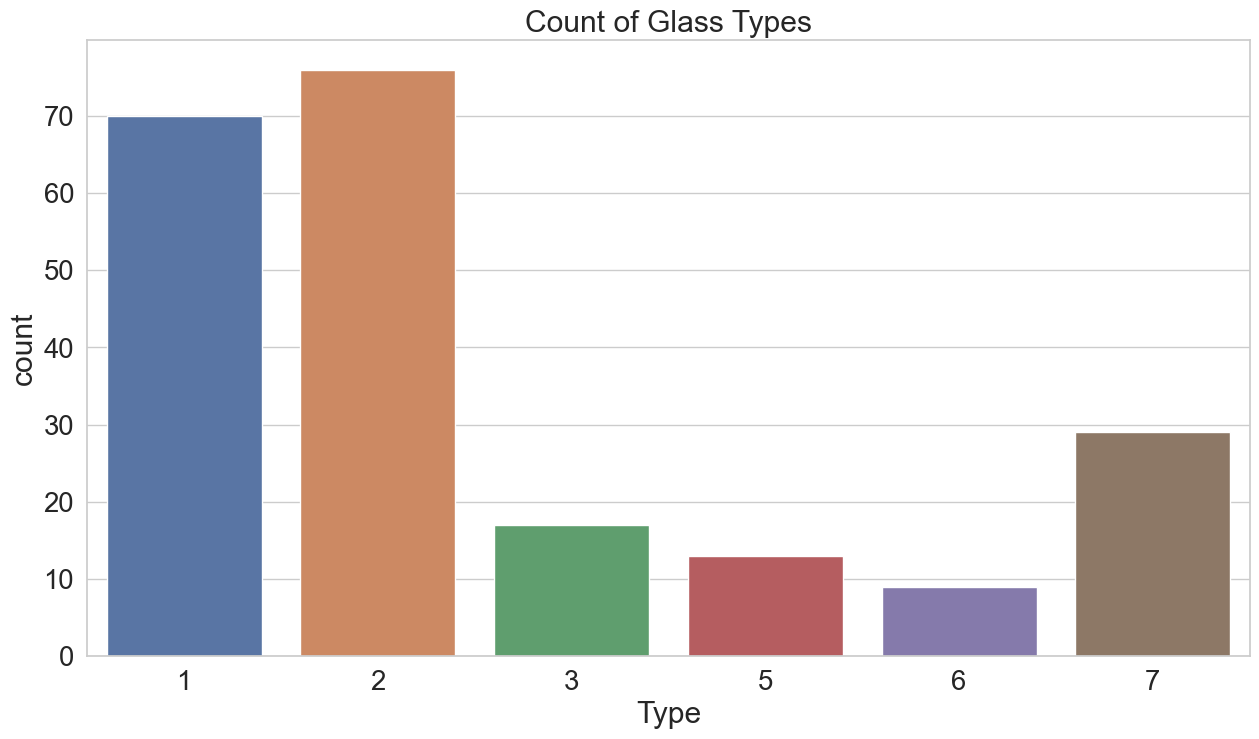

In [29]:
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot(x='Type',data=glass).set_title('Count of Glass Types') 
# plot showing count of each glass type , basically checking target class distribution

<AxesSubplot:>

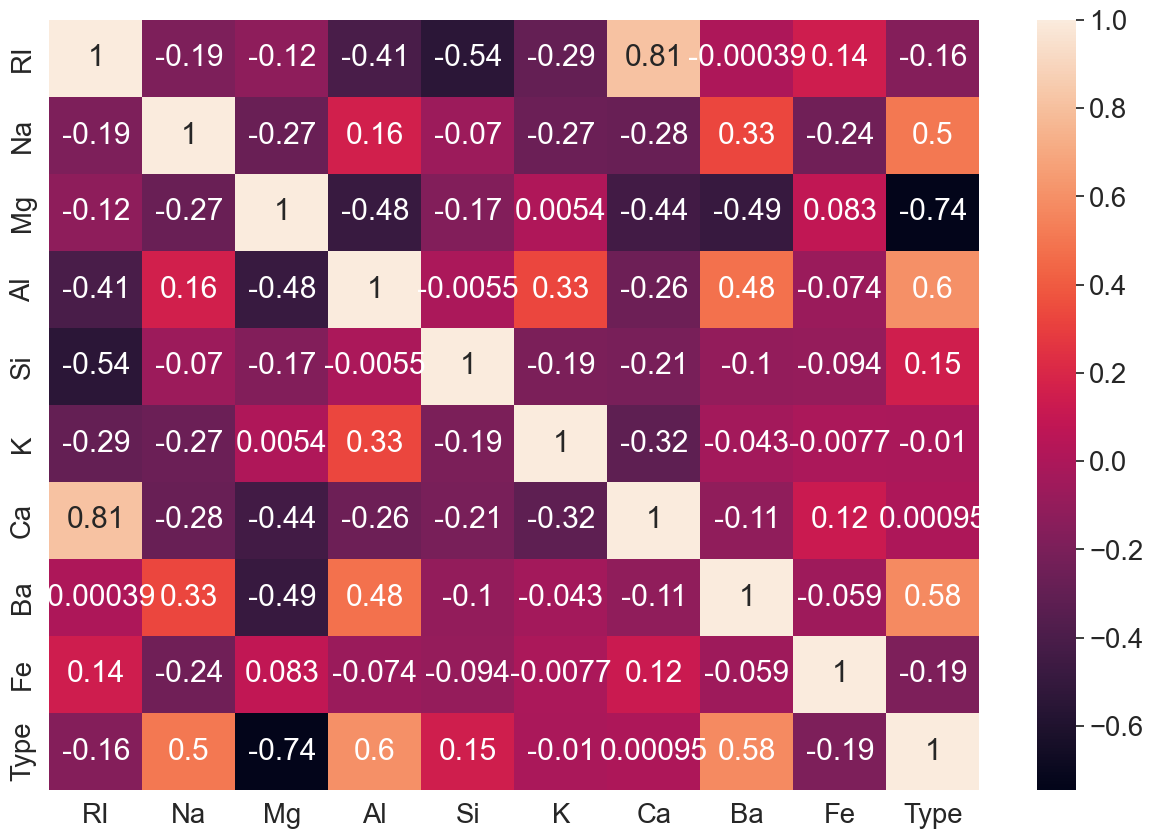

In [30]:
plt.subplots(figsize=(15,10))
sns.heatmap(glass.corr(),annot=True)